# Pengenalan Multiple Linear Regression and Polunomial Regression

In [1]:
# training dataset 

import pandas as pd

pizza = {'diameter': [6,8,10,14,18],
         'n_topping': [2,1,0,2,0],
         'harga': [7,9,13,17.5,18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


In [3]:
#  testing dataset

pizza = {'diameter': [8,9,11,16,12],
         'n_topping': [2,0,2,2,0],
         'harga': [11,8.5,15,18,11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


In [4]:
import numpy as np

x_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'x_train: {x_train}')
print(f'y_train: {y_train}')

x_train: [[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]
y_train: [ 7.   9.  13.  17.5 18. ]


In [5]:
x_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'x_test: {x_test}')
print(f'y_test: {y_test}')

x_test: [[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]
y_test: [11.   8.5 15.  18.  11. ]


In [6]:
# multiple linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'r squared: {r2_score(y_test,y_pred)}')

r squared: 0.7701677731318468


In [7]:
# polynomial regression
# memodelkan hubungan antara independent variable x dan dependent variable y sebagai derajat polynomial dalam x

In [9]:
# preprocessing dataset

x_train = np.array(train_pizza_df['diameter']).reshape(-1,1)
y_train = np.array(train_pizza_df['harga'])
                   
print(f'x train: {x_train}')
print(f'y train: {y_train}')

x train: [[ 6]
 [ 8]
 [10]
 [14]
 [18]]
y train: [ 7.   9.  13.  17.5 18. ]


In [12]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)

print(f'x train quadratic: {x_train_quadratic}')

x train quadratic: [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


In [13]:
model = LinearRegression()
model.fit(x_train_quadratic, y_train)

LinearRegression()

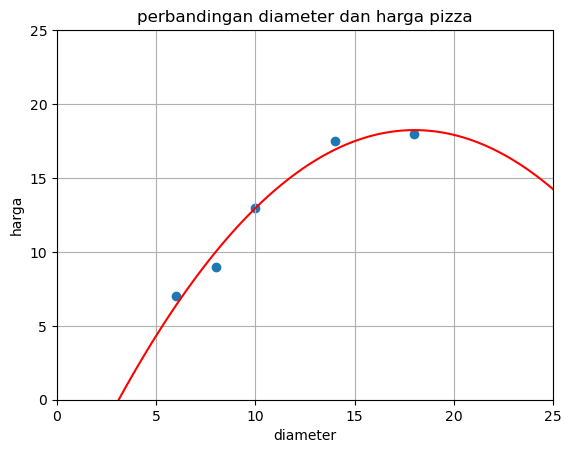

In [15]:
import matplotlib.pyplot as plt

x_vis = np.linspace(0,25,100).reshape(-1,1)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis_quadratic = model.predict(x_vis_quadratic)

plt.scatter(x_train, y_train)
plt.plot(x_vis, y_vis_quadratic, '-r')

plt.title('perbandingan diameter dan harga pizza')
plt.xlabel('diameter')
plt.ylabel('harga')

plt.xlim(0,25)
plt.ylim(0,25)

plt.grid(True)
plt.show()

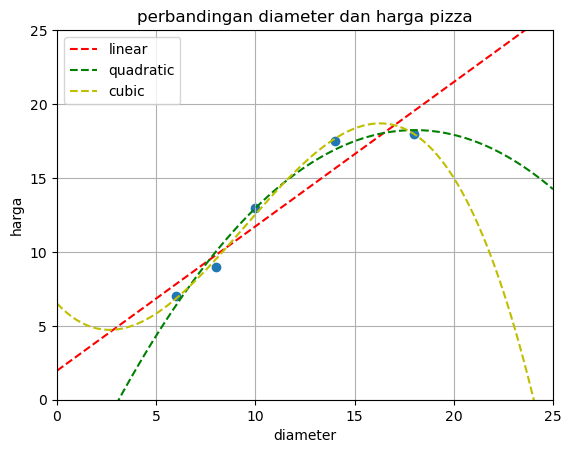

In [18]:
plt.scatter(x_train, y_train)

model = LinearRegression()
model.fit(x_train, y_train)

x_vis = np.linspace (0,25,100).reshape(-1,1)
y_vis = model.predict(x_vis)
plt.plot(x_vis, y_vis, '--r', label='linear')


quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_quadratic, y_train)

x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis = model.predict(x_vis_quadratic)

plt.plot(x_vis, y_vis, '--g', label='quadratic')


cubic_feature = PolynomialFeatures(degree=3)
x_train_cubic = cubic_feature.fit_transform(x_train)
model=LinearRegression()
model.fit(x_train_cubic, y_train)

x_vis_cubic = cubic_feature.transform(x_vis)
y_vis = model.predict(x_vis_cubic)

plt.plot(x_vis, y_vis, '--y', label='cubic')


plt.title('perbandingan diameter dan harga pizza')
plt.xlabel('diameter')
plt.ylabel('harga')
plt.legend()

plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()